## 找尋資料中心

In [5]:
temp = [23,25,26,17,19,20,22,27,28]
sum(temp)
len(temp)

sum(temp) / len(temp)

23.0

In [6]:
temp1 = [23,25,26,17,19,20,22,27,28, 999 , 999 ]
sum(temp1) / len(temp1)

200.45454545454547

In [10]:
temp1 = [23,25,26,17,19,20,22,27,28, 999, 999 ]
temp1.sort()
temp1

[17, 19, 20, 22, 23, 25, 26, 27, 28, 999, 999]

In [11]:
temp1[5]

25

In [13]:
from collections import Counter
c = Counter(temp1)
c.most_common(3)

[(999, 2), (17, 1), (19, 1)]

## 使用Pandas 找出資料中心

In [14]:
import pandas
tw2330 = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pyfintech/master/tw2330.csv', na_values='null', parse_dates={'Dates':[0]})

In [15]:
tw2330.head()

,Dates,Open,High,Low,Close,Volume,Adj Close
0,2016-07-21,171.0,172.0,170.0,172.0,33130000,172.0
1,2016-07-20,170.0,170.5,169.0,170.0,38053000,170.0
2,2016-07-19,170.5,170.5,169.0,170.5,42456000,170.5
3,2016-07-18,168.0,170.0,168.0,169.5,24749000,169.5
4,2016-07-15,169.5,169.5,169.5,169.5,41000,169.5


In [17]:
tw2330['Close'].mean()

75.93924959016354

In [18]:
tw2330['Close'].median()

63.0236

## 量測IQR

In [19]:
temp1 = [23,25,26,17,19,20,22,27,28, 999, 999 ]
temp1.sort()
temp1

[17, 19, 20, 22, 23, 25, 26, 27, 28, 999, 999]

In [22]:
temp1[5]

25

In [24]:
quarter1 = (20 + 22) / 2
quarter1

21.0

In [27]:
quarter3 = (27 + 28) / 2
quarter3

27.5

In [32]:
IQR = quarter3 - quarter1
IQR

6.5

## 量測IQR (使用Pandas)

In [34]:
tw2330['Close'].median()

63.0236

In [35]:
tw2330['Close'].quantile(0.75)

88.47500000000001

In [37]:
tw2330['Close'].quantile(0.5)

63.0236

In [38]:
tw2330['Close'].quantile(0.25)

54.860425

In [39]:
IQR = tw2330['Close'].quantile(0.75) - tw2330['Close'].quantile(0.25)
IQR

33.61457500000001

Populating the interactive namespace from numpy and matplotlib


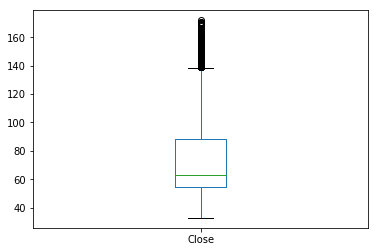

In [40]:
%pylab inline
tw2330['Close'].plot(kind = 'box')

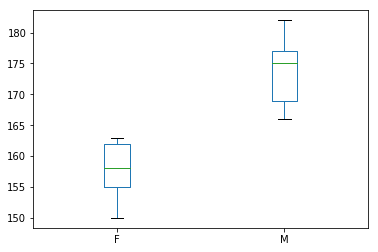

In [46]:
df = pandas.DataFrame([[150,166], [155, 182], [163, 175], [158, 177], [162, 169]])
df.columns = ['F', 'M']
df.plot(kind = 'box')

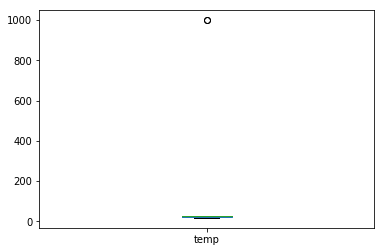

In [50]:
tempdf = pandas.DataFrame([23,25,26,17,19,20,22,27,28, 999, 999 ])
tempdf.columns = ['temp']
tempdf.plot(kind = 'box')

Populating the interactive namespace from numpy and matplotlib


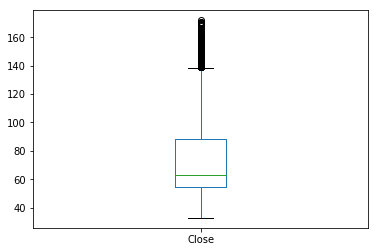

In [53]:
%pylab inline
tw2330['Close'].plot(kind = 'box')

Populating the interactive namespace from numpy and matplotlib


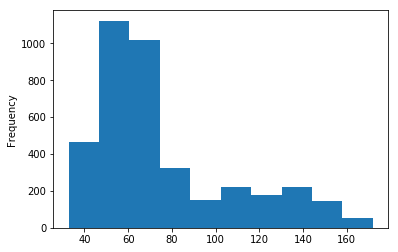

In [54]:
%pylab inline
tw2330['Close'].plot(kind = 'hist')

## 標準差

In [58]:
X_avg = 30
X = [10,20,30,40,50]


In [59]:
abs(10 - 30) + abs(20 - 30) + abs(30 - 30) + abs(40 - 30) + abs(50 - 30)

60

In [65]:
import numpy
import math
X1     = numpy.array(X)
X1_avg = 30
math.sqrt(sum(((X1 - X1_avg) ** 2)) / (len(X1) - 1))

15.811388300841896

## 標準差 (使用Pandas)

In [69]:
tw2330['Close'].var()

1004.0219018810959

In [71]:
tw2330['Close'].std() * tw2330['Close'].std()

1004.0219018810959

## 資料分布

Populating the interactive namespace from numpy and matplotlib


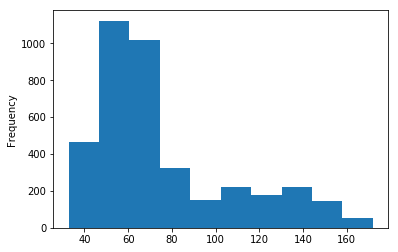

In [72]:
%pylab inline
tw2330['Close'].plot(kind = 'hist')

In [78]:
tw2330['DailyReturn'] = tw2330['Close'].pct_change(1)

In [85]:
tw2330['DailyReturn2'] =  (tw2330['Close'] / tw2330['Close'].shift(1)) - 1

Populating the interactive namespace from numpy and matplotlib


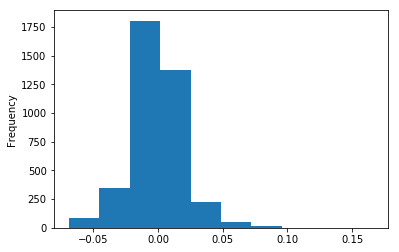

In [87]:
%pylab inline
tw2330['DailyReturn'].plot(kind = 'hist')

In [89]:
tw2330['DailyReturn'].mean()
tw2330['DailyReturn'].std()

0.020097776093334855

## 安裝 Pandas-DataReader

In [91]:
! pip install pandas-datareader

  Running setup.py bdist_wheel for requests-file: started
  Running setup.py bdist_wheel for requests-file: finished with status 'done'
  Stored in directory: C:\Users\Student\AppData\Local\pip\Cache\wheels\3e\34\3a\c2e634ca7b545510c1b3b7d94dea084e5fdb5f33558f3c3a81
  Running setup.py bdist_wheel for requests-ftp: started
  Running setup.py bdist_wheel for requests-ftp: finished with status 'done'
  Stored in directory: C:\Users\Student\AppData\Local\pip\Cache\wheels\76\fb\0d\1026eb562c34a4982dc9d39c9c582a734eefe7f0455f711deb
Successfully built requests-file requests-ftp


In [93]:
import pandas_datareader as pdr
#pdr.get_data_yahoo('AAPL')

In [95]:
import pandas_datareader as pdr
twii = pdr.get_data_yahoo('^TWII')
tw2330 = pdr.get_data_yahoo('2330.TW')

In [99]:
import pandas
result=pandas.merge(twii,tw2330,left_index=True,right_index=True,how='inner')

In [101]:
result[['Close_x','Close_y']].cov()

,Close_x,Close_y
Close_x,748112.535980,31636.479934
Close_y,31636.479934,2091.726074


In [103]:
result[['Close_x','Close_y']].corr()

,Close_x,Close_y
Close_x,1.000000,0.791137
Close_y,0.791137,1.000000


## 點估計

In [112]:
import pandas
tw2330 = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pyfintech/master/tw2330.csv', na_values='null', parse_dates={'Dates':[0]})
tw2330['DailyReturn'] = tw2330['Close'].pct_change(1)

In [113]:
import numpy as np
np.random.seed(10)

In [114]:
sample_size = 100
sample      = np.random.choice(a=tw2330['DailyReturn'], size=sample_size)
sample_mean = sample.mean()

In [115]:
sample_mean

0.0046790036049509454

## 信賴區間

In [127]:
from scipy import stats
sz_critical=stats.norm.ppf(q=0.975)
sz_critical

1.959963984540054

In [128]:
from scipy import stats
z_critical=stats.norm.ppf(q=0.995)
z_critical

2.5758293035489004

In [129]:
pop_stdev=tw2330['DailyReturn'].std()

In [130]:
pop_stdev=tw2330['DailyReturn'].std()
margin_of_error= sz_critical* (pop_stdev / math.sqrt(sample_size))

In [132]:
sample_mean - margin_of_error, sample_mean + margin_of_error 

(0.00073991187372230306, 0.0086180953361795869)

## 假設檢定

In [133]:
from scipy import stats
one_sample_data=[15.48,4.4,5.81,6.07,5.19,3.25,4.41,5.05,11.63,8.99]
one_sample=stats.ttest_1samp(one_sample_data,8)
print(one_sample[1]/2)

0.22325177944
